<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Eigensystem of covariance matrix
- Fitting lines and planes

<hr/>

<h1><font color="yellow">Recap from last time</font></h1>

### Eigendecomposition 

> $ C = E\,\Lambda\,E^T$ and $E^T C\,E = \Lambda$ since $E^T E=I$
><br/><br/>
> or
><br/><br/>
>$\displaystyle C = \sum_{k=1}^N\ \lambda_k\left(\boldsymbol{e}_k\,\boldsymbol{e}_k^T\right) 
= \sum_{k=1}^N\ \lambda_k P_k $
- P_k is a projection matrix that projects a vector V onto the direction of e_k

The result of this operation is a square matrix of size n x n (where n is the number of elements in e_k). This matrix has a special property: when you multiply it by any vector v in the same space as e_k, the result is a vector that lies on the line defined by e_k. In other words, it projects v onto the direction defined by e_k. That's why e_k * e_k^T is called a projection matrix and denoted by P_k.

So, P_k = e_k * e_k^T is the projection matrix onto the k-th eigenvector, and it's used in PCA to transform the data into a new coordinate system defined by the eigenvectors.

### Scree Plot

- The eigenvalue spectrum

>$ \big\{ \lambda_1, \lambda_2, \dots, \lambda_N \big\}$

- How many important directions?

> Keep $K =\,?$ principal components

- Explained variance of components 

> Cf. $\mathbb{Var}[X\pm{}Y] = \mathbb{Var}[X]+\mathbb{Var}[Y]$ if uncorrelated

#### Generate data

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5)

In [25]:
import scipy
import pandas as pd

In [26]:
# generate 10-D vectors: scale, rotate
np.random.seed(1) # for reproducibility and creates a pseudo-random number generator

Z = scipy.stats.norm(0,1).rvs(size=(10,1000)) # 10-D vectors
print(Z.shape)

if True: # scale them here
    for i in range(Z.shape[0]): 
        Z[i,:] *= np.sqrt(i)
    Z[:4,:] *= 1e-7
    
# quick-n-dirty random rotation
M = np.random.randn(Z.shape[0], Z.shape[0])
Q,_ = np.linalg.qr(M) # QR decomposition
Y = Q @ Z # random rotation
print (Y.shape)

np.savetxt("temp.csv", Y.T, delimiter=",")

(10, 1000)
(10, 1000)


In [27]:
# remove all previous variables from memory
del Y, M, Q, Z

In [28]:
try:
    print (f'Shape of Y is {Y.shape}')
except NameError as e:
    print (f'Error message: {e}')    

Error message: name 'Y' is not defined


#### Analyze data

Now your data file is available here: [temp.csv](temp.csv)

In [43]:
# pandas dataframe - table data structure
y = pd.read_csv('temp.csv', header=None)
y.shape

(1000, 10)

In [30]:
# re-load the Y matrix and convert dataframe to matrix
Y = pd.read_csv('temp.csv',header=None).values.T
Y.shape

(10, 1000)

The .set_aspect('equal') method is used to set the aspect ratio of the subplot. The aspect ratio is the ratio of the width to the height of the plot. By setting it to 'equal', we're ensuring that the units on the x and y axes are the same, meaning that a unit distance is the same in both the x and y directions. This is useful for plots where the relative scales of the x and y axes are important, such as scatter plots or when plotting geometric shapes.

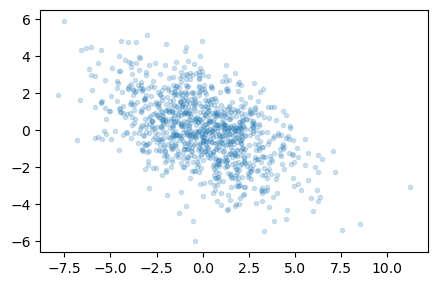

In [45]:
plt.subplot(1,1,1).set_aspect('equal')
plt.plot(Y[0,:], Y[6,:], '.', alpha=0.2);

In [32]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=Y.shape[0], whiten=False)
pca.fit(Y.T)

print(f'''Eigenvalues of Cov as calculated by PCA: 
{pca.explained_variance_}''') 

B = pca.transform(Y.T).T
B[:2,:4]

Eigenvalues of Cov as calculated by PCA: 
[9.15229681e+00 7.95568137e+00 6.99119215e+00 5.79201733e+00
 4.80041913e+00 4.05751984e+00 3.05438862e-14 1.86810821e-14
 1.05299519e-14 3.71023802e-31]


array([[-3.6946082 , -2.65830536,  3.41084971, -5.66224603],
       [ 5.47313599,  3.39172957, -3.86412925, -2.81314035]])

In [49]:
# singular value decomposition of data matrix returns U,W,V
Y -= Y.mean(axis=1, keepdims=True) # center the data in one line by taking the mean of each row and subtracting it from the row
# Y has 10 random variables and 1000 observations
U, W, _ = np.linalg.svd(Y)

print(f'''Eigenvalues of Cov as calculated by SVD: 
{np.square(W) / (Y.shape[1] - 1)}''') # There are 10 eigenvalues

B = U.T @ Y # B is the coefficient matrix
B[:2,:4]
B.shape
print(B[6:])

Eigenvalues of Cov as calculated by SVD: 
[9.15229681e+00 7.95568137e+00 6.99119215e+00 5.79201733e+00
 4.80041913e+00 4.05751984e+00 3.05438862e-14 1.86810820e-14
 1.05299519e-14 1.24959836e-30]
[[-2.50384743e-08  3.36510826e-08  1.66176561e-07 ... -1.54446163e-07
   1.03138481e-07  9.18160583e-08]
 [ 1.07849476e-07  3.83995484e-08 -8.15172222e-08 ...  4.88002047e-09
  -2.12052105e-07 -1.80033502e-07]
 [ 3.26037596e-08  2.46011760e-07 -5.17110628e-08 ...  8.83570639e-08
  -5.09846568e-08 -1.22769751e-07]
 [ 2.89715916e-15 -1.25735705e-15  2.47014728e-17 ...  1.58584410e-15
  -9.70011156e-16 -4.82331653e-16]]


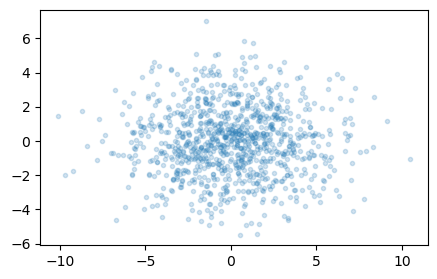

In [47]:
plt.subplot(1,1,1).set_aspect('equal')
plt.plot(B[0,:], B[5,:], '.', alpha=0.2);

In [35]:
E, L = pca.components_.T, pca.explained_variance_

> TODO!!!!!!
- scree plot used to see which dimensions capture the most variance so we can identify which dimensions to keep and which to discard


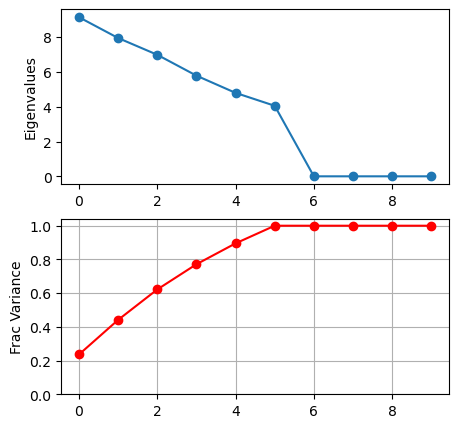

In [36]:
plt.subplot(2,1,1); plt.plot(L,'o-'); plt.ylabel('Eigenvalues')
plt.subplot(2,1,2); cl=np.cumsum(L); plt.ylabel('Frac Variance')
plt.plot(cl/cl[-1],'o-r'); plt.ylim(0,None); plt.grid()

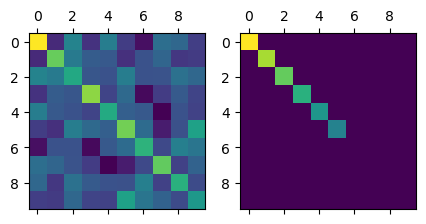

In [37]:
# plot orig and new covariance matrices (estimate w/o norm)
ax=plt.subplot(1,2,1); ax.matshow(Y @ Y.T)  # this is the covariance matrix of the original data
ax=plt.subplot(1,2,2); ax.matshow(B @ B.T); # this is the covariance matrix of the transformed data

In [38]:
np.diag(B @ B.T / (B.shape[1] - 1)) # diagonal of the covariance matrix

array([9.15229681e+00, 7.95568137e+00, 6.99119215e+00, 5.79201733e+00,
       4.80041913e+00, 4.05751984e+00, 3.05438862e-14, 1.86810821e-14,
       1.05299519e-14, 1.47857697e-30])

In [39]:
pca.explained_variance_ # eigenvalues of the covariance matrix

array([9.15229681e+00, 7.95568137e+00, 6.99119215e+00, 5.79201733e+00,
       4.80041913e+00, 4.05751984e+00, 3.05438862e-14, 1.86810821e-14,
       1.05299519e-14, 3.71023802e-31])

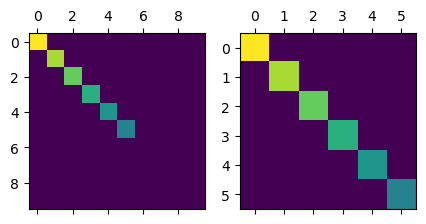

In [40]:
A = B[:6,:]
# plot new covariance matrices with and without truncation
ax=plt.subplot(1,2,1); ax.matshow(B @ B.T)
ax=plt.subplot(1,2,2); ax.matshow(A @ A.T);

Can go back to higher dimensions by multiplying the data by the eigenvectors


### Inverse of the Covariance Matrix

- Appears in the multivariate normal distribution!

>$\displaystyle{\cal{}N}(x;\mu,C) = \frac{1}{\sqrt{\det(2\pi{}C)}}\ \exp\left[-\frac{1}{2}(x\!-\!\mu)^T\,C^{-1} (x\!-\!\mu)\right]$

- Inverse of the diagonal eigenvalue matrix

>$\displaystyle \Lambda^{-1} =  \left( \begin{array}{ccc}
\frac{1}{\lambda_1} &  & \cdots & 0\\
 & \frac{1}{\lambda_2} &   & \vdots\\
\vdots &  & \ddots &  \\
0 & \cdots &  & \frac{1}{\lambda_N} \\
\end{array} \right)$

- Inverse of the covariance matrix

>$\displaystyle C^{-1} = E\ \Lambda^{-1} E^T$

- Also see pseudoinverse with small eigenvalues 

### Fitting Lines

- What if $x$ and $y$ are both noisy? 

> For example, $\big\{(x_i,y_i)\big\}$ measurements have the same uncertainties. 
> The relevant residuals are perpendicular to the line.
> Minimizing RMS of residuals is related to maximizing the sample variance along line!

- Sounds like the PCA problem?


### Fitting Planes

- Similarly, fitting a $K$-dimensional hyperplane in $N$ dimensions, i.e., looking for the $a$ normal vector to minimize residuals on set of centered $\{x_i\}$ vectors

> Minimizing sum of square lengths of the residual vectors
><br/><br/>
>$\displaystyle \qquad \min_a \sum_i r_i^T r_i \ \ \ \ \ $  where $\ \ \ r_i = x_i - a\left(a^T x_i\right)$
><br/><br/>
> yields 
><br/><br/>
>$\displaystyle \qquad \min_a \sum_i \Big[x_i^T x_i - x_i^T a \left(a^T x_i\right) - a^T x_i \left(a^T x_i\right) + a^T a \left(a^T x_i\right)^2 \Big]$
><br/><br/>
>$\displaystyle \qquad \min_a \ \left[\textrm{const} - \sum_i a^T\!\!\left(x_i x_i^T\right) a\right]$
><br/>
or
><br/>
>$\displaystyle \qquad \max_a \ a^T\!\left(\sum_i x_i x_i^T\right)\, a $ 
><br/><br/>
> cf. sample variance along $a$, if data already centered

- Essentially same as the PCA problem!

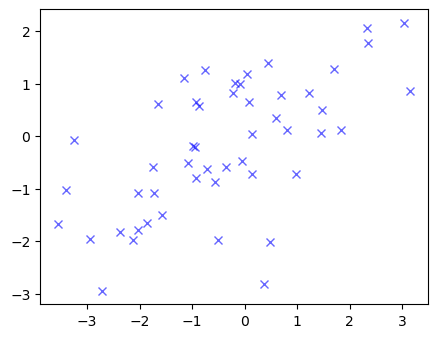

In [41]:
# generate 2D (column) vectors
np.random.seed(seed=42);
N = scipy.stats.norm(0,1).rvs((2,50)); 
N[0,:] *= 2 
f = np.pi / 6   # rotate by 30 deg
R = np.array([[np.cos(f), -np.sin(f)],
              [np.sin(f),  np.cos(f)]]) 
X = R @ N

plt.subplot(1,1,1).set_aspect('equal')
plt.plot(X[0,:], X[1,:], 'xb', alpha=0.6);

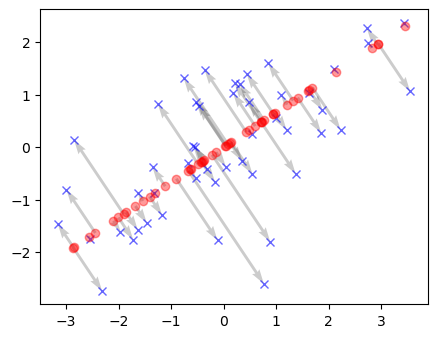

In [42]:
# project on 1st pricipal component
X -= X.mean(axis=1, keepdims=True) 
E,_,_ = np.linalg.svd(X) # only the eigenvectors
F = E[:,:1]       # truncated basis: only PC1
P = F @ F.T @ X   # projection
R = X - P         # residuals 

plt.subplot(1,1,1).set_aspect('equal')
plt.plot(X[0,:],X[1,:], 'xb', alpha=0.6)
plt.plot(P[0,:],P[1,:], 'or', alpha=0.4)
plt.quiver(P[0,:],P[1,:], R[0,:],R[1,:], alpha=0.2,
    angles='xy', scale_units='xy', scale=1);

### More on Fitting Later

- Next: Bayesian inference